In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls '/content/drive'

MyDrive


In [5]:
#Give dataset path
train_path = '/content/drive/MyDrive/My_projects/skin_care_Transfer_learning/data/train'
test_path = '/content/drive/MyDrive/My_projects/skin_care_Transfer_learning/data/test'

Working with 1120 images
Image examples: 
1114.jpg


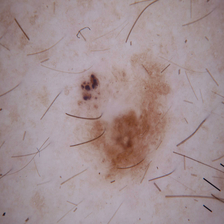

1181.jpg


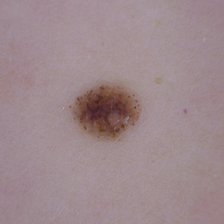

1124.jpg


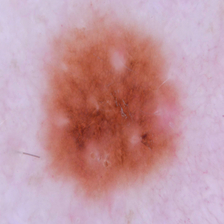

1099.jpg


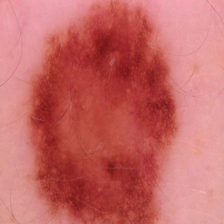

1015.jpg


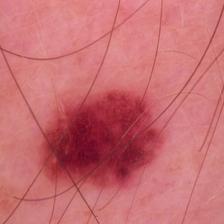

1272.jpg


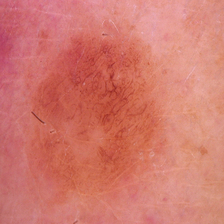

1189.jpg


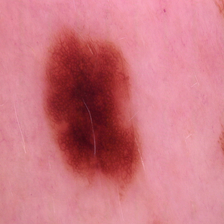

1152.jpg


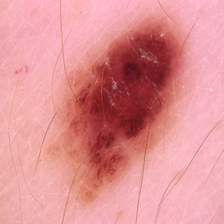

1320.jpg


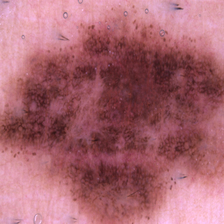

1081.jpg


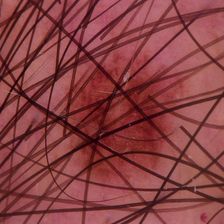

In [6]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object 
folder = train_path+'/benign'
onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")
for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [10]:
folders = glob('/content/drive/MyDrive/My_projects/skin_care_Transfer_learning/data/train/*')
print(len(folders))

2


In [11]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
from keras import optimizers
adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [14]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2317 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [18]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='mymodel.h5', verbose=2, save_best_only=True)
callbacks = [checkpoint]
start = datetime.now()
model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
  callbacks=callbacks ,verbose=2)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10



Epoch 1: val_loss improved from inf to 2.04718, saving model to mymodel.h5
5/5 - 36s - loss: 1.9464 - accuracy: 0.8000 - val_loss: 2.0472 - val_accuracy: 0.8000 - 36s/epoch - 7s/step
Epoch 2/10


5/5 - 21s - loss: 1.7930 - accuracy: 0.8438 - 21s/epoch - 4s/step
Epoch 3/10


5/5 - 17s - loss: 2.0640 - accuracy: 0.8125 - 17s/epoch - 3s/step
Epoch 4/10


5/5 - 12s - loss: 2.3741 - accuracy: 0.7937 - 12s/epoch - 2s/step
Epoch 5/10


5/5 - 14s - loss: 1.4176 - accuracy: 0.8188 - 14s/epoch - 3s/step
Epoch 6/10


5/5 - 15s - loss: 1.1385 - accuracy: 0.8438 - 15s/epoch - 3s/step
Epoch 7/10


5/5 - 15s - loss: 1.8270 - accuracy: 0.7188 - 15s/epoch - 3s/step
Epoch 8/10


5/5 - 13s - loss: 1.3138 - accuracy: 0.8313 - 13s/epoch - 3s/step
Epoch 9/10


5/5 - 11s - loss: 1.4067 - accuracy: 0.8438 - 11s/epoch - 2s/step
Epoch 10/10


5/5 - 12s - loss: 1.2661 - accuracy: 0.8250 - 12s/epoch - 2s/step
Training completed in time:  0:03:18.317063


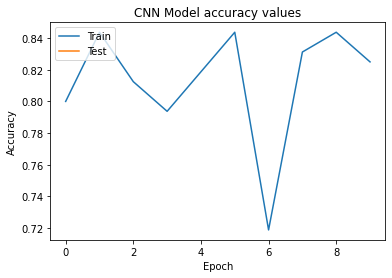

In [19]:
# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
